In [1]:
import numpy as np
import pandas as pd

In [7]:
class GaussianNB:
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.classes = np.unique(y)
        num_classes = len(self.classes)
        
        self.mean = np.zeros((num_classes, num_features))
        self.var = np.zeros((num_classes, num_features))
        self.priors = np.zeros(num_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y==c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / num_samples
            
        print('Mean: ',self.mean)
        print('-' * 20)
        print('Variance: ',self.var)
        print('-' * 20)
        print('Priors: ',self.priors)
        print('-' * 20)
        
        
    def pdf(self, class_id, X):
        mean = self.mean[class_id]
        var = self.var[class_id]
        numerator = np.exp(-((X - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def posterior(self, x):
        '''calculates the product of likelihood and priors for one data point'''
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = np.sum(np.log(self.pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
    
        return self.classes[np.argmax(posteriors)], posteriors
                
    def predict(self, X):
        prob = []
        y_pred = []
        
        for x in X:
            y_, p = self.posterior(x)
            prob.append(p)
            y_pred.append(y_)
            
        return y_pred, prob
        
        

In [8]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=[[5,5], [10,10]],
                  cluster_std=1.5,
                  random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

In [9]:
clf = GaussianNB()
clf.fit(X = X_train,
        y = y_train)

Mean:  [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]
--------------------
Variance:  [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]
--------------------
Priors:  [0.5125 0.4875]
--------------------


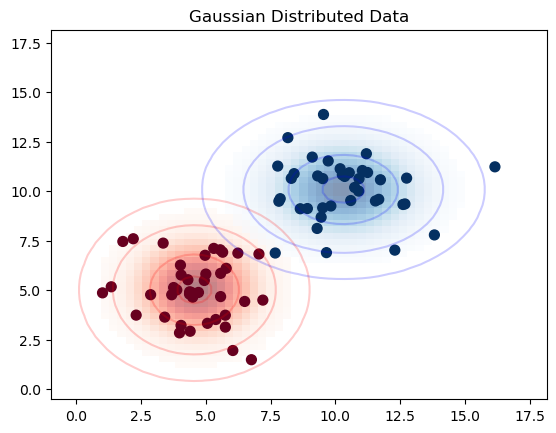

In [10]:
from utils import plot
plot(X_train, y_train)

In [11]:
y_pred, proba = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



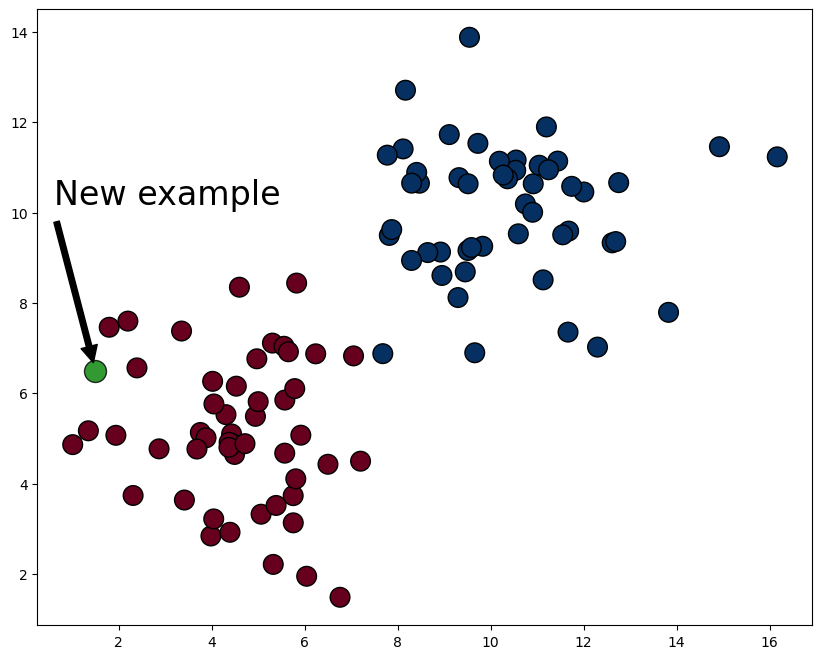

In [15]:
import matplotlib.pyplot as plt
x_new = np.array([1.5, 6.5])
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=200, edgecolor='k', cmap='RdBu')

plt.scatter(x_new[0], x_new[1], marker='o', c='green',
            s=250, edgecolor='k', alpha=0.8)

plt.annotate('New example', xy=x_new, 
             xytext=(-30,120), textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=24)
plt.show()
